In [5]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# %%
# Carrega o dataset Iris
iris = load_iris()

# Converte para DataFrame do Pandas para facilitar a manipulação
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Exibe as 5 primeiras linhas do DataFrame
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# %%
# Mostra estatísticas descritivas das variáveis
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


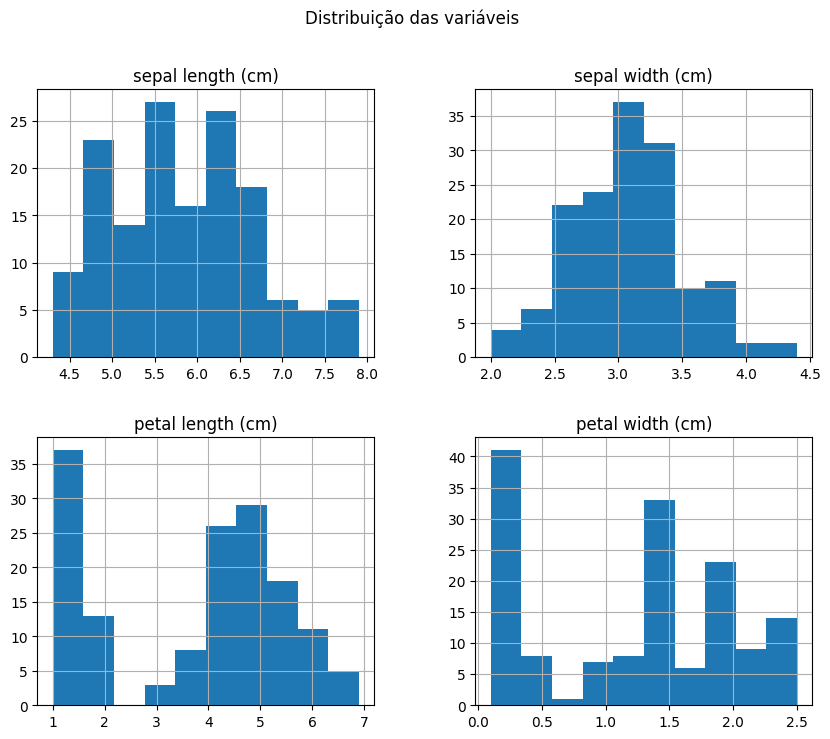

In [8]:
# %%
# Gera histogramas para cada variável
X.hist(figsize=(10, 8))
plt.suptitle("Distribuição das variáveis")
plt.show()

In [9]:
# %%
# Divide o dataset em treino (70%) e teste (30%)
# O stratify=y garante que a proporção das classes seja a mesma nos dois conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 105 amostras
Tamanho do conjunto de teste: 45 amostras


In [10]:
# %%
# Cria o classificador de Árvore de Decisão
# criterion="entropy" usa a entropia como medida de impureza
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Treina o modelo com os dados de treino
clf.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


In [11]:
# %%
# Faz previsões nos dados de teste
y_pred = clf.predict(X_test)

# Imprime a acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))

# Imprime o relatório de classificação com precisão, recall e f1-score
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Acurácia: 0.8888888888888888

Relatório de classificação:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.81      0.87      0.84        15
   virginica       0.86      0.80      0.83        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



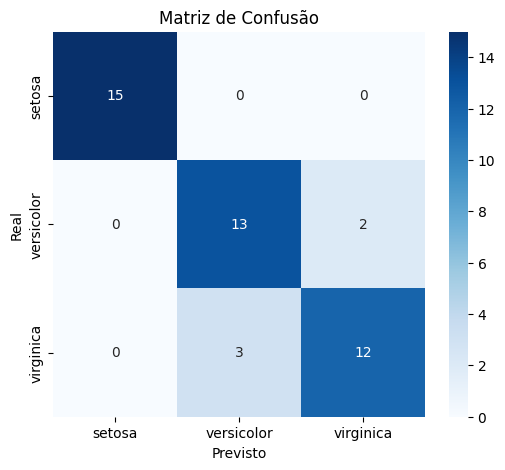

In [12]:
# %%
# Gera a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plota a matriz de confusão usando um heatmap para melhor visualização
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    xticklabels=iris.target_names, 
    yticklabels=iris.target_names
)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

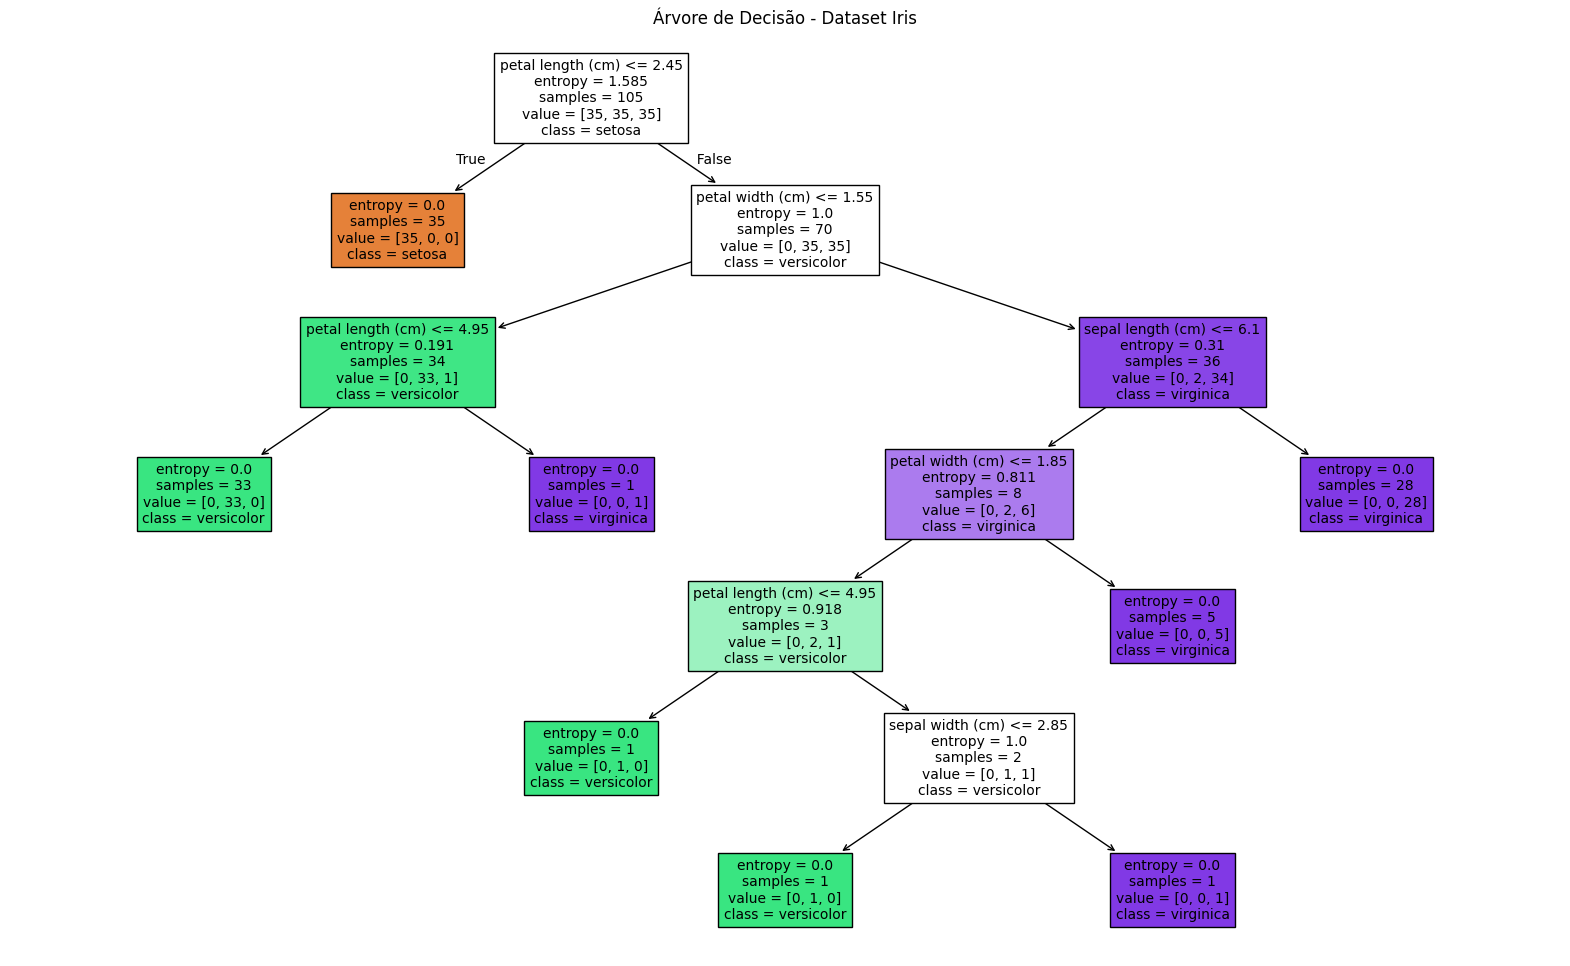

In [13]:
# %%
# Plota a árvore de decisão gerada
plt.figure(figsize=(20, 12))
plot_tree(
    clf, 
    feature_names=iris.feature_names, 
    class_names=list(iris.target_names), 
    filled=True,
    fontsize=10
)
plt.title("Árvore de Decisão - Dataset Iris")
plt.show()